# CNN - NN - Image Classification
## 10 Classification
05/04/2020

In [ ]:
#creating labels for data and how to import
https://www.kaggle.com/uvxy1234/cifar-10-implementation-with-pytorch
    

In [ ]:
https://blog.paperspace.com/pytorch-101-building-neural-networks/

![title](https://cdn-images-1.medium.com/max/800/1*uZrS4KjAuSJQIJPgOiaJUg.png)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pickle


import torchvision.transforms as transforms #transforms the dataset into variouys
import torchvision
import torchvision.datasets as datasets
from torch.autograd import Variable

from PIL import Image
import torch.optim as optim
import os

from torch.utils.data import Dataset


https://www.kaggle.com/uvxy1234/cifar-10-implementation-with-pytorch

In [2]:
# conda install nomkl

In [40]:
os.chdir('/Users/heoun/Downloads/cifar-10/')
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [41]:
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
https://discuss.pytorch.org/t/custom-label-for-torchvision-imagefolder-class/52300/8

In [45]:
#https://stackoverflow.com/questions/51906144/pytorch-image-label

#### Normalize the dataset and Transformations for the Images for Train and Test

In [35]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4), #32x32 is the size of the random cropping?
    transforms.RandomHorizontalFlip(), #randomly flips the image so it would be able to provide more training
    #transforms.RandomResizedCrop(32) #will exttract a patch size of (32,32) from the image randomly, 
    transforms.ToTensor(), #converts the input image into a PYTorch Tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #input data scaling and values precomputed for the dataset
])
#Normalize does the following for each channel:
    #image = (image - mean) / std
# Normalize the test set same as training set without augmentation
#first tuple is teh mean and the second is referring to the std - it normalizes to the 1/1 range
#Normalization helps get data within a range and reduces the skewness which helps learn faster and better


#forums say transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  greyscale - transforms.Normalize([0.5], [0.5])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#Validation Transfomrations
# transforms.Resize(256) #input image is ressized by (256,256)
# transforms.CentreCrop(224) #crops the center part of the image of th eshape (224,224)

### Load the Datasets

In [50]:
#Load our dataset FROM A FOLDER - images are loaded in respective folders - https://pytorch.org/docs/stable/torchvision/datasets.html
train_dataset = datasets.ImageFolder(root = '1/', transform = transform_train) #A function/transform that takes in an PIL image and returns a transformed versiona

test_dataset = datasets.ImageFolder(root = '2/', transform = transform_test) 

#https://pytorch.org/tutorials/beginner/data_loading_tutorial.html?highlight=torchvision%20datasets%20imagefolder
#It seems like the program tends to recursively read in files, that is convenient in some cases.

In [69]:
df_labels = pd.read_csv('trainLabels.csv')


df_labels[1:6]


,id,label
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile


In [71]:
###pd.Series(y_train).groupby(y_train).count() #checking the labels and making sure they are balanced

In [72]:
train_dataset.class_to_idx = pd.Series(df_labels['label'].values,index=df_labels['id']).to_dict()

In [73]:
train_dataset.classes = ('airplane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [74]:
batch_size =4
train_load = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = 6) #size is huge so ram can only handle so much. need a batch size to split it up to get to the full epoch - base 8 - bigger batch size = faster training
test_load = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True, num_workers = 6)

#shuffle lets you figure out generalized principles not just 1 ,2 ,3 ,4 ,5 ,6

#returns a list of x and y tensors.
#https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9


With the steps being larger, the batch size is smaller, indicating that there needs to be more passes as it will not reach the local minima fast enough. The loss is less messy than the previous iteration because the epoch was increased to accomodate the steps. The loss is starting to look a bit messy, but the loss is smaller than the previous model. We would not be able to determine whether the data is overfitting or underfitting because of there not being a validation set.


Increasing the steps_per_epoch and increasing the number of epochs did not have an impact on the accuracy in this assignment. Instead the loss did fluctuate significantly. In a typical scenario, an increase in steps per epoch would increase the accuracy, but is prone to overfitting. The train error would be low but the test/validation would be high (aka low bias high variance/generalization). Since there is no validation test, we cannot be certain of over or underfitting. However the 50steps 100 epoch is absolutely overfitting as it goes through the epoch repeatedly through the train to train the model.

To note, batch size determines the # of samples in a mini-batch. If we have one epoch, batch size is how big is each split. The bigger the size, the smaller the steps that are taken to eventually reach epoch. An epoch means one iteration on the entire train data. 



Increasing the steps_per_epochs would increase the accuracy, but at the same time it prones to overfitting. This means that the train error would be very low, yet your test/validation error would be very high.
Increasing the number of epochs: similar to increase the steps_per epoch.
Based on the models that I had run in this assigment, the results from the train_error also confirms the mentioned effects above when we increase steps_per_epochs or number of epochs. Below is an example with the loss when we increase steps_per_epoch and increase the epoch

batch_size determines the number of samples in each mini batch. Its maximum is the number of all samples, which makes gradient descent accurate, the loss will decrease towards the minimum if the learning rate is small enough, but iterations are slower. Its minimum is 1, resulting in stochastic gradient descent: Fast but the direction of the gradient step is based only on one example, the loss may jump around. batch_size allows to adjust between the two extremes: accurate gradient direction and fast iteration. Also, the maximum value for batch_size may be limited if your model + data set does not fit into the available (GPU) memory.

steps_per_epoch the number of batch iterations before a training epoch is considered finished. If you have a training set of fixed size you can ignore it but it may be useful if you have a huge data set or if you are generating random data augmentations on the fly, i.e. if your training set has a (generated) infinite size. If you have the time to go through your whole training data set I recommend to skip this parameter.
validation_steps similar to steps_per_epoch but on the validation data set instead on the training data. If you have the time to go through your whole validation data set I recommend to skip this parameter.


An epoch usually means one iteration over all of the training data. For instance if you have 20,000 images and a batch size of 100 then the epoch should contain 20,000 / 100 = 200 steps. However I usually just set a fixed number of steps like 1000 per epoch even though I have a much larger data set. At the end of the epoch I check the average cost and if it improved I save a checkpoint. There is no difference between steps from one epoch to another. I just treat them as checkpoints.

In [75]:
#Show a batch of images
def imgshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [76]:
# get some random training images
dataiter = iter(train_load) #iterates over the train_load
images, labels = dataiter.next() #shows the image and label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


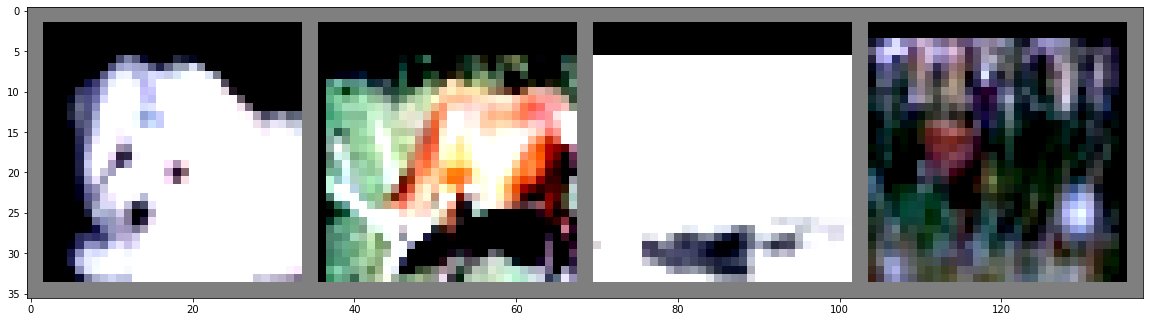

In [77]:
imgshow(torchvision.utils.make_grid(images)) # creates a grid of the fig size 20/20

In [78]:
print("Train Data set consists of {} images".format(len(train_dataset)))
print("Train Batch set consists of {} images".format(len(train_load)))
print("Test Data set consists of {} images".format(len(test_dataset)))
print("Test Batch set consists of {} images".format(len(test_load)))

Train Data set consists of 50000 images
Train Batch set consists of 12500 images
Test Data set consists of 300000 images
Test Batch set consists of 75000 images


In [79]:
class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    
    def forward(self, x):
        # Do your print / debug stuff here
        print(x.shape)
        return x
    
    
    
class net(nn.Module): #inheriting the Module from torch.nn.Module
    ''' 
    This has the basic components of the NN
    '''
    def __init__(self):
        super(net, self).__init__()

        self.conv_layer = nn.Sequential(
        #1st convolutional layer
            #PrintLayer(), #torch.Size([100, 3, 32, 32])
            nn.Conv2d(stride = 1, in_channels = 3, out_channels = 12, kernel_size = 3, padding = 1),  #so we have an input of 3 because rgb causes it to be 3->12
                #stride - amount of movement over the image
                #3 inputs and creates 12 outputs
                #padding is at the outer edges
                #kernel size of the kernel 3x3 
            #PrintLayer(), #torch.Size([100, 12, 32, 32])
            nn.BatchNorm2d(12), #12-> 12
                #improves speed, performance, stability
                #normalizes the input layer by recentering and rescaling
                #standardizes the activations of a node in the previous layer
                #also called whitening the images
                #stabilizes the mean and varaince of each unit + relationship between units and nonlinears
                #very effective in sigmoidal nonlinearities
                #https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
            nn.ReLU(inplace = True), #adds the relu function - relu(output) 12-> 12 relu
            #PrintLayer(), #torch.Size([100, 12, 32, 32])
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0), #maxpooling reduces the size of the kernel size 32/2 = 16 
            #conceptually you are creating a kernel size to pool over aand determine the amount to replace. 
            #a kernel of 1x1 and stride of 1 won't do anything. kernel 2x2 and stride 2 will shrink the data by 2
            #https://computersciencewiki.org/index.php/Max-pooling_/_Pooling
            #There is no learning done in max pooling layers, no weights or parameters to update just down sampling. 
            #However in convolutional layers there are weights that are learned so  down samples the data (if no padding is used) but it also extractes learned features.
            #PrintLayer(), #torch.Size([100, 12, 16, 16])
            #2nd covolutional layer
            nn.Conv2d(stride = 1, in_channels = 12, out_channels = 32, kernel_size = 3, padding = 1),  #padding = 1 does nothing, 2 increases the feature size by 2
            #PrintLayer(), 
            nn.BatchNorm2d(32), #32 -> 32
            #PrintLayer(),
            nn.ReLU(inplace = True), #adds the relu function - relu(output)
            #PrintLayer(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0) #maxpooling reduces the size of the kernel size 16/2 = turns it into 8
        )

        self.fc_layer = nn.Sequential(
                    
            #Flatten the feature maps. You have 32 feature maps with each feature being the size of 8x8 aka 32*8*8 
            #We know the original picture size was 
            nn.Linear(in_features=2048, out_features=1024),   #Flattened image of a 1x2048 is fed into linear NN 
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.2),                    #Dropout used to reduce overfitting
            nn.Linear(in_features=1024, out_features=512),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=512, out_features=500),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=500, out_features=50),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=50, out_features=10) 
            
            #Since there were so many features, I decided to use 45 layers to get output layers. 
            #You can increase the kernels in Maxpooling to reduce image further and reduce number of hidden linear layers.
        )
       
        
    def forward(self, x):
        """Performs the forward Pass"""
        
        #Convolutional Layers - Hidden Layers
        x = self.conv_layer(x)
        
        ##print(x.shape) check shape before
        #Flatten the layers to prepare to process it through the MLP
        x = x.view(x.size(0), -1) #100 batch sizes for however many features there are originally to start
        #print(x.size(0)) check shape again to confirm
        ##print(x.shape)
        
        #MLP Layer 
        x = self.fc_layer(x)
        
        return x
    

In [80]:
model = net()
# CUDA = torch.cuda.is_available() #moves to gpu
# if CUDA:
#     model = model.cuda()  

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #parameters essentially come from the NN that was originally built

#Cross Entropy Loss - Defined by log loss with expectation of a 1D tensor


#SGD optimizer
#this is the sgd optimizer that then gets to the loss function learning rate of 0.001, momentum is  #learning rate

print(model)

net(
  (conv_layer): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=2048, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=512, out_features=500, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.2, inplace=Fal

In [81]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels) #takes the crossentrpoyloss and plugs it into output and labels
        #has backward prop + loss function
        loss.backward()
        optimizer.step() #use SGD

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


#RuntimeError: size mismatch, m1: [100 x 1568], m2: [2048 x 1024] at ../aten/src/TH/generic/THTensorMath.cpp:41

#m1 is [a x b] which is [batch size x in features]
#m2 is [c x d] which is [in features x out features]

[1,  2000] loss: 0.041842260
[1,  4000] loss: 0.000090319
[1,  6000] loss: 0.000050210
[1,  8000] loss: 0.000020069
[1, 10000] loss: 0.000028088
[1, 12000] loss: 0.000034071
[2,  2000] loss: 0.000014899
[2,  4000] loss: 0.000016095
[2,  6000] loss: 0.000012820
[2,  8000] loss: 0.000012087
[2, 10000] loss: 0.000008667
[2, 12000] loss: 0.000010557
Finished Training


In [82]:

PATH = '/Users/heoun/Downloads/cifar-10/3/cifar_net.pth'
torch.save(model.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  airplane airplane airplane airplane


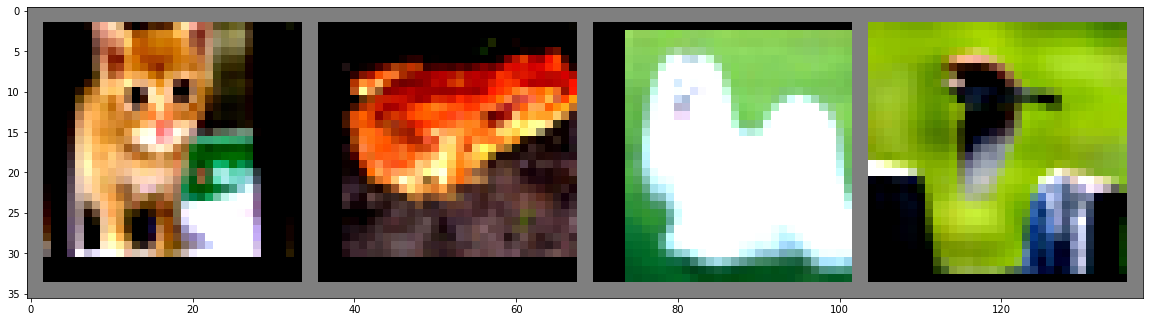

In [83]:
#test the network
dataiter = iter(train_load)
images, labels = dataiter.next()

# print images
imgshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [84]:
########################################################################
# Next, let's load back in our saved model (note: saving and re-loading the model
# wasn't necessary here, we only did it to illustrate how to do so):

net = net()
net.load_state_dict(torch.load(PATH))

########################################################################
# Okay, now let us see what the neural network thinks these examples above are:

outputs = net(images)

In [85]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:  airplane airplane airplane airplane


In [86]:
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
with torch.no_grad():
    for data in test_load:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 100 %


In [87]:
# That looks way better than chance, which is 10% accuracy (randomly picking
# a class out of 10 classes).
# Seems like the network learnt something.
#
# Hmmm, what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_load:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 100 %


ZeroDivisionError: float division by zero

In [ ]:
# Okay, so what next?
#
# How do we run these neural networks on the GPU?
#
# Training on GPU
# ----------------
# Just like how you transfer a Tensor onto the GPU, you transfer the neural
# net onto the GPU.
#
# Let's first define our device as the first visible cuda device if we have
# CUDA available:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)


In [ ]:
# The rest of this section assumes that ``device`` is a CUDA device.
#
# Then these methods will recursively go over all modules and convert their
# parameters and buffers to CUDA tensors:
#
# .. code:: python
#
#     net.to(device)
#
#
# Remember that you will have to send the inputs and targets at every step
# to the GPU too:
#
# .. code:: python
#
#         inputs, labels = data[0].to(device), data[1].to(device)
#
# Why dont I notice MASSIVE speedup compared to CPU? Because your network
# is really small.
#
# **Exercise:** Try increasing the width of your network (argument 2 of
# the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
# they need to be the same number), see what kind of speedup you get.
#
# **Goals achieved**:
#
# - Understanding PyTorch's Tensor library and neural networks at a high level.
# - Train a small neural network to classify images
#
# Training on multiple GPUs
# -------------------------
# If you want to see even more MASSIVE speedup using all of your GPUs,
# please check out :doc:`data_parallel_tutorial`.
#
# Where do I go next?
# -------------------
#
# -  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
# -  `Train a state-of-the-art ResNet network on imagenet`_
# -  `Train a face generator using Generative Adversarial Networks`_
# -  `Train a word-level language model using Recurrent LSTM networks`_
# -  `More examples`_
# -  `More tutorials`_
# -  `Discuss PyTorch on the Forums`_
# -  `Chat with other users on Slack`_
#
# .. _Train a state-of-the-art ResNet network on imagenet: https://github.com/pytorch/examples/tree/master/imagenet
# .. _Train a face generator using Generative Adversarial Networks: https://github.com/pytorch/examples/tree/master/dcgan
# .. _Train a word-level language model using Recurrent LSTM networks: https://github.com/pytorch/examples/tree/master/word_language_model
# .. _More examples: https://github.com/pytorch/examples
# .. _More tutorials: https://github.com/pytorch/tutorials
# .. _Discuss PyTorch on the Forums: https://discuss.pytorch.org/
# .. _Chat with other users on Slack: https://pytorch.slack.com/messages/beginner/
